<a href="https://colab.research.google.com/github/NazarovMM/mmo_course_2023/blob/main/LR1/MMO_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы машинного обучения ЛР1
## Создание "истории о данных" (Data Storytelling)
### Выполнил студент группы ИУ5-25М Назаров М.М.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

В данной работе использутся датасет **Disney+ Movies and TV Shows** (https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows)

In [ ]:
df = pd.read_csv('/content/sample_data/disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
#столбцы, содеожащиеся в датасете
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#информация о столбцах, количесвте строк, типов данных и количестве не пустых записей
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
#информация и постых значениях
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
#подсчёт сериалов и фильмов в датасете
df['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

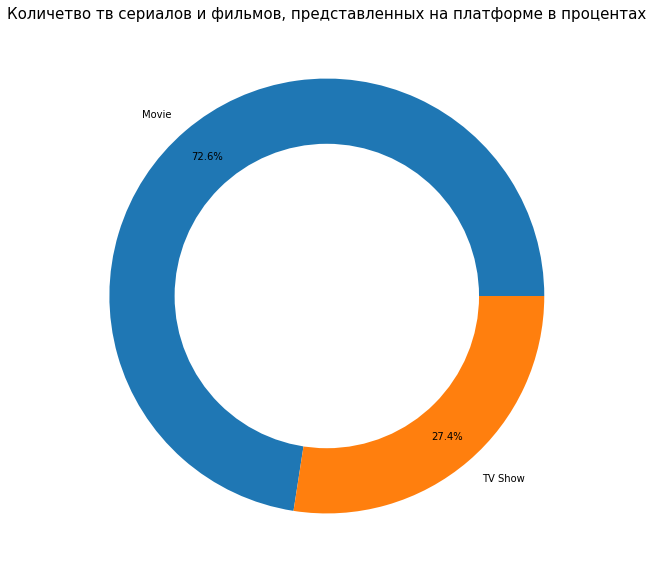

In [ ]:
labels=['Movie', 'TV Show']
plt.figure(figsize=(10, 10))
plt.title("Количетво тв сериалов и фильмов, представленных на платформе в процентах",fontsize=15)
plt.pie(df['type'].value_counts(), labels=labels, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

На основе DOUGHNUT диаграммы можно сделать вывод, что каталог Disney+ почти на 3/4 состоит из различных фильмов.

In [ ]:
disney_rating=df['rating'].dropna().unique()
print(disney_rating)

['TV-G' 'PG' 'TV-PG' 'PG-13' 'TV-14' 'G' 'TV-Y7' 'TV-Y' 'TV-Y7-FV']


Выше описан вывод уникальных рейтингов: в данном датасете присутствуют фильмы и тв сериалы из-за чего в нем содержится сразу два разных возрастных рейтинга. Первый PG, PG-13 и G - являются возрастными рейтингами для фильмов. Вторая группа включает в себя все оставшиеся возрастные рейтинги, предназначенные для телевидения.

In [ ]:
#количество фильмов/сериалов с определенным рейтингом
df['rating'].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

<ipython-input-51-a0405b4261f4>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(values, counts)


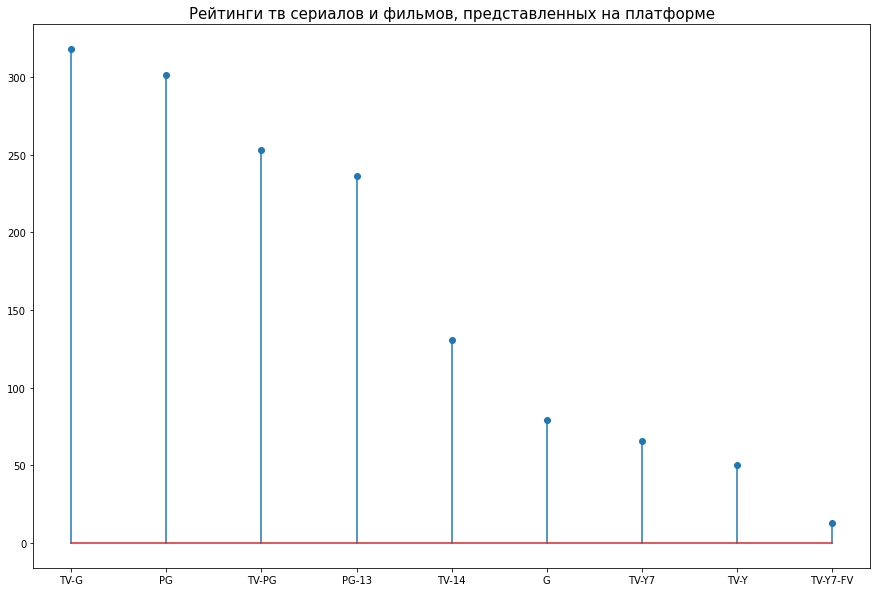

In [ ]:
plt.figure(figsize=(15, 10))

plt.title("Рейтинги тв сериалов и фильмов, представленных на платформе",fontsize=15)
values = df['rating'].dropna().unique()
counts = df['rating'].value_counts().tolist()
plt.stem(values, counts)
plt.show()

На основание LOLLIPOP диаграммы можно сделать вывод, что в каталоге Disney+ большая часть контента предназначена для совместного просмотра детей и родителей.

In [ ]:
df['release_year'].dropna().unique()

array([2016, 1988, 2011, 2021, 2015, 2019, 2008, 2020, 2007, 2013, 2018,
       2014, 2012, 2006, 2010, 1996, 2009, 2017, 1993, 1994, 1998, 1989,
       1997, 2005, 2000, 2004, 1987, 1985, 1967, 1973, 1991, 1956, 1995,
       1984, 1974, 1959, 2003, 1976, 2001, 1990, 1992, 1952, 1955, 1977,
       1957, 1999, 1948, 1964, 1969, 1942, 1950, 1951, 1953, 1949, 1940,
       1946, 1954, 1936, 1944, 1935, 1939, 1975, 1978, 2002, 1971, 1961,
       1962, 1981, 1932, 1938, 1941, 1986, 1947, 1937, 1966, 1943, 1934,
       1980, 1960, 1983, 1972, 1982, 1979, 1928, 1965, 1970, 1963, 1933,
       1945, 1968])

In [ ]:
df['release_year'].value_counts()

2021    125
2020    114
2019     99
2017     69
2018     65
       ... 
1928      1
1944      1
1970      1
1945      1
1968      1
Name: release_year, Length: 90, dtype: int64

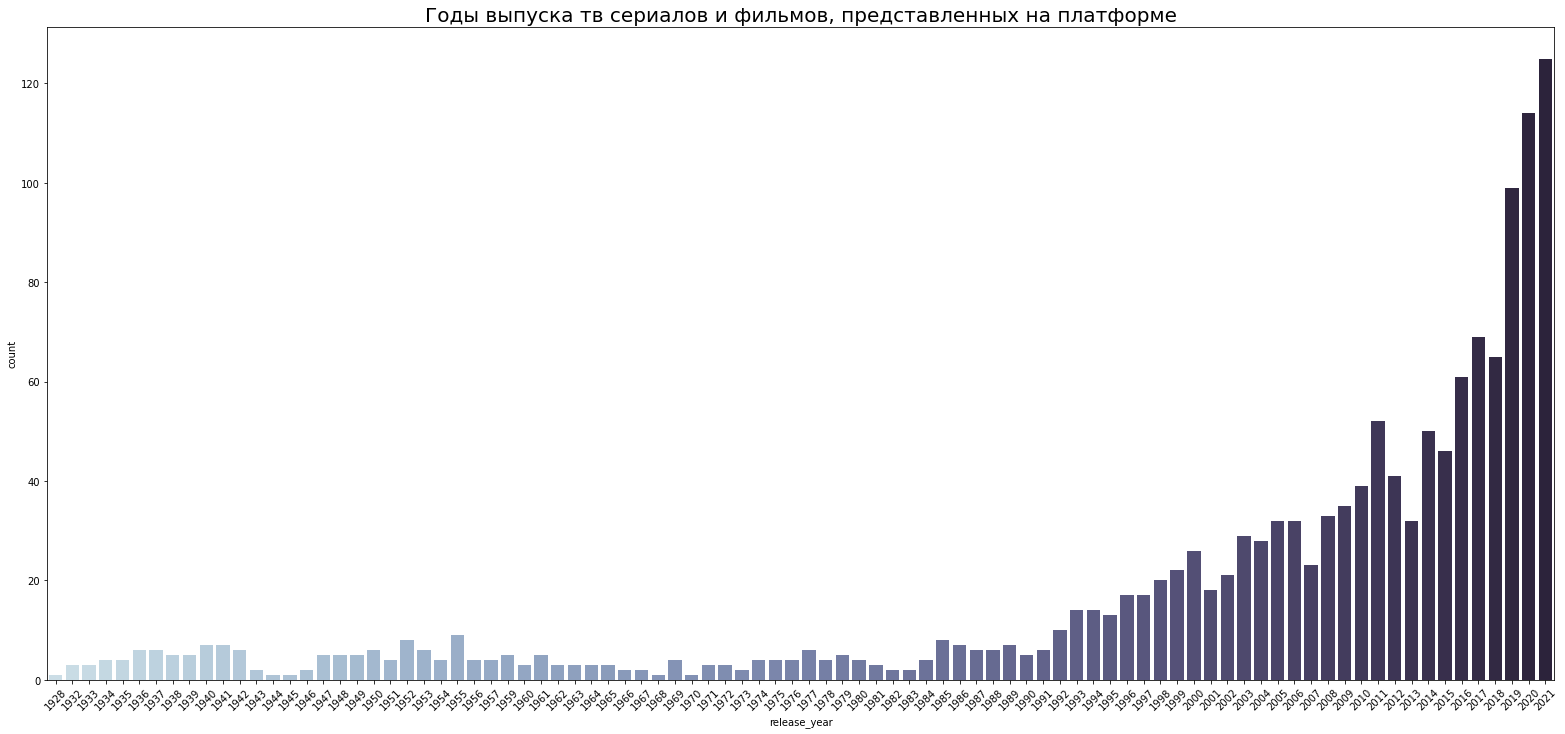

In [ ]:
plt.figure(figsize=(27, 12))
plt.title("Годы выпуска тв сериалов и фильмов, представленных на платформе",fontsize=20)
c1=sns.countplot(x='release_year',data=df,palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=45)
plt.show()

На графике выше можно увидеть распределение выхода различного контента по годам, входящих в каталог Disney+, и можно сдлеать вывод, что количества контента значительно увеличмлость за последние 3 года, что связано с запуском Disney+ и специально снятого для него контента, так и покупку 20th Century Studios и добавление её каталога в библиотеку сервиса.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


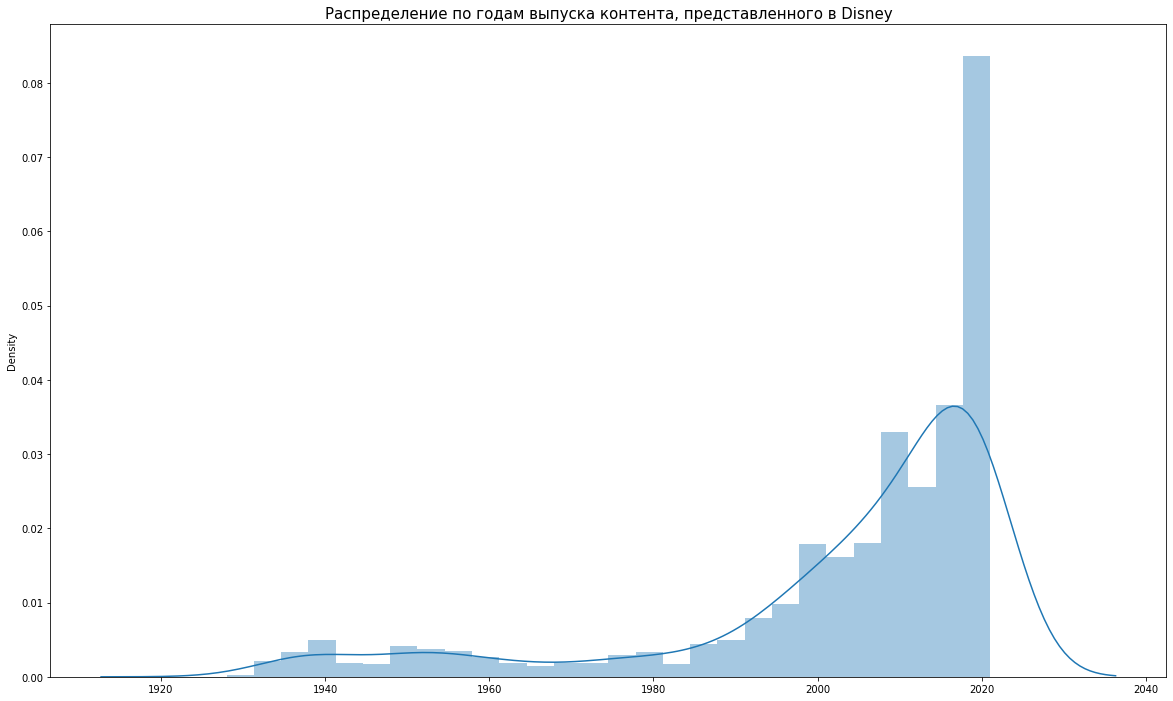

In [ ]:
plt.figure(figsize=(20,12))
sns.distplot(x=df["release_year"])
plt.title("Распределение по годам выпуска контента, представленного в Disney", size=15)
plt.show()

Данный график позволяет нам увидеть динамику выпуска контента, представленного в каталоге Disney+.

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [ ]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub = data_sub.reset_index()
print(data_sub)

type month_name_added  TV Show  Movie
0               April       25     86
1              August       21     50
2            December       13     52
3            February       18     44
4             January       23     61
5                July       35     85
6                June       22     52
7               March       10     24
8                 May       30     62
9            November      145    809
10            October       22     63
11          September       31     59


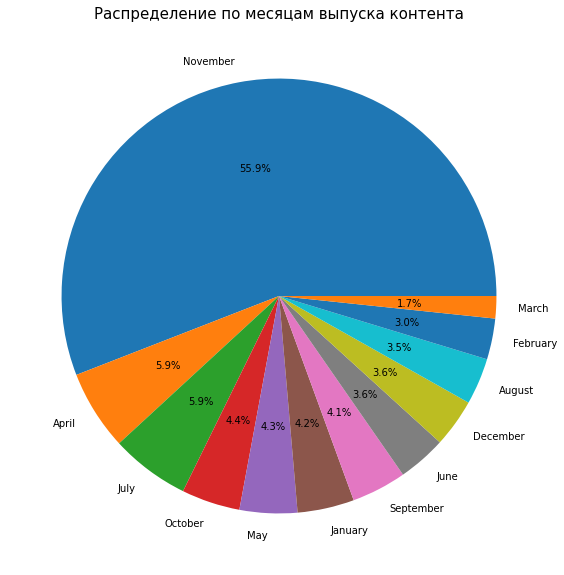

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Распределение по месяцам выпуска контента", size=15)
labels = ['November','April','July','October','May' ,'January','September','June','December','August','February','March']
plt.pie(df['month_name_added'].value_counts(),labels=labels, autopct='%1.1f%%',)
plt.show()

PIE диаграмма выше позволяет увидеть нам, что больше всего контента выходит в ноября, что скорее всего связано с тем, что этот месяц является началом праздничного периода в США, на который приходится наибольшая выручка различных киностудий.

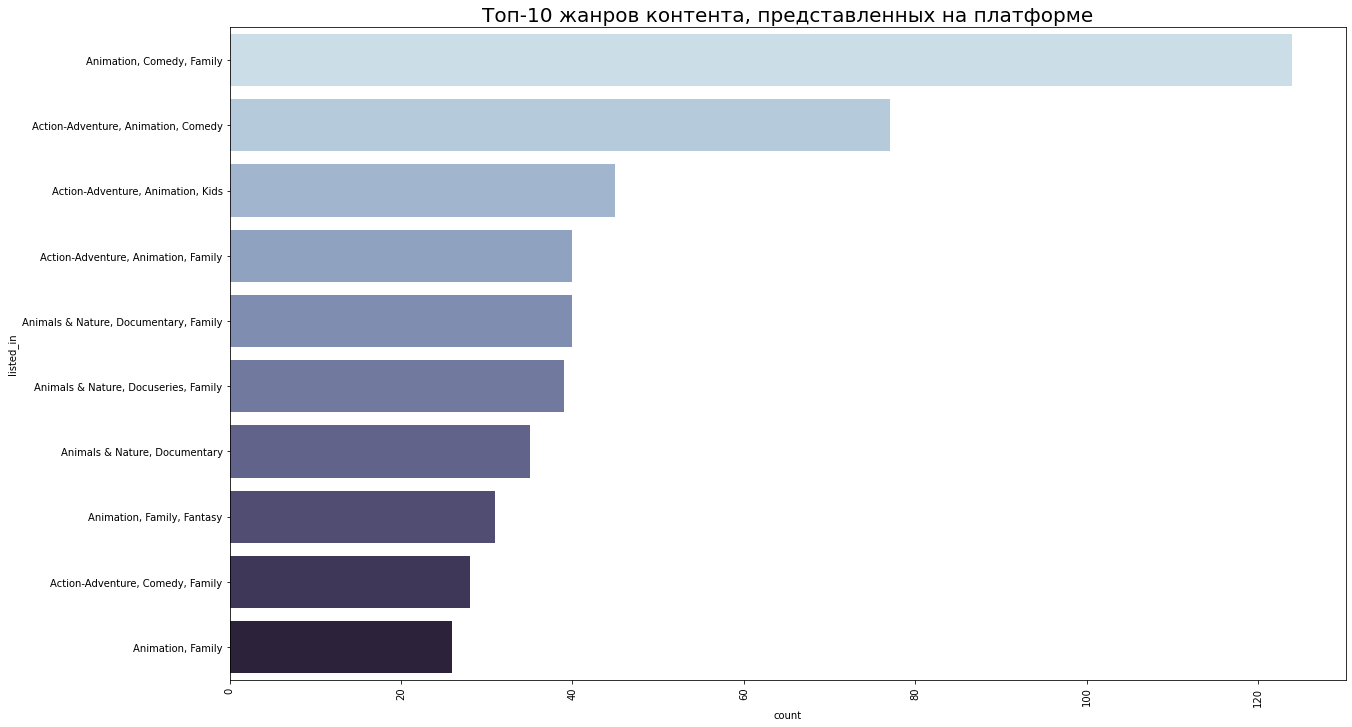

In [ ]:
plt.figure(figsize=(20, 12))
plt.title("Топ-10 жанров контента, представленных на платформе",fontsize=20)
c1=sns.countplot(y='listed_in',data=df,palette="ch:s=.25,rot=-.25",order=df.listed_in.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Столбчатая диаграмма выше позволяет увидеть, что больше всего контента в каталоге это семейные комедии.

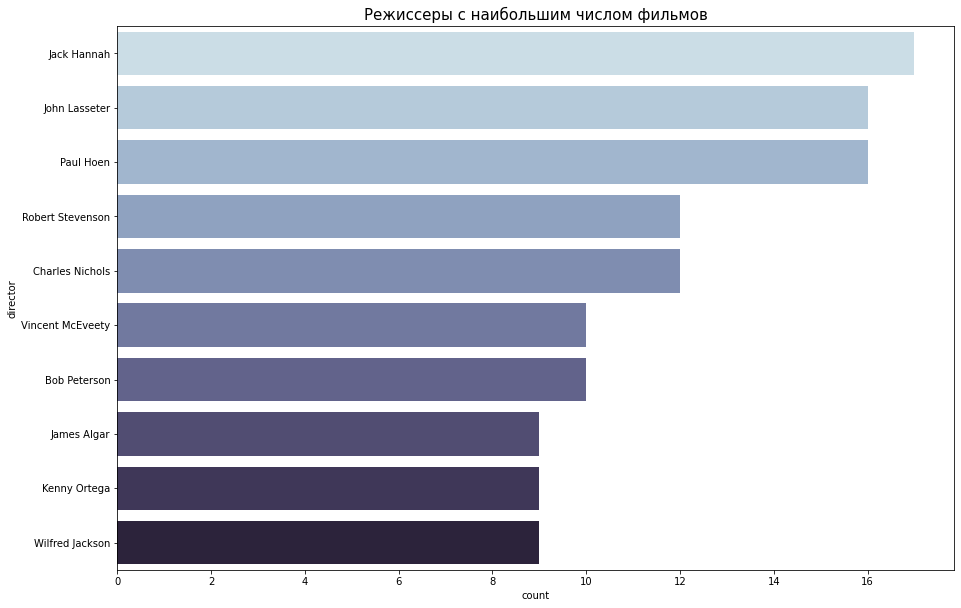

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Режиссеры с наибольшим числом фильмов", size=15)
c1=sns.countplot(y='director',data=df,palette="ch:s=.25,rot=-.25",order=df.director.value_counts().iloc[:10].index)
plt.show()

Выше представлен топ 10 режиссеров, принявших участие в съемке фильмов для платформы наибольшее число раз.